## FP7 project objective analyse

Starting from data published by the commission on FP7 projects at https://data.europa.eu/euodp/en/data/dataset/cordisfp7projects we do some data mining. Especially we look for textile related projects to do some statistics.

In [1]:
import pandas as pd
import csv

#modules for NLP
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

from collections import Counter

##### Dataset files were downloaded locally

reports = pd.read_csv('C:/Users/jl/Downloads/h2020reports.csv', sep= ";", encoding='LATIN1') <br/>
organisations = pd.read_csv('C:/Users/jl/Downloads/h2020organizations.csv', sep= ";", encoding='LATIN1', ) <br/>
deliverables = pd.read_csv('C:/Users/jl/Downloads/h2020projectDeliverables.csv', sep= ";",encoding='LATIN1') <br/>
projects = pd.read_csv('C:/Users/jl/Downloads/h2020projects.csv', sep= ";",encoding='LATIN1')

In [2]:
projects = pd.read_csv('C:/Users/jl/Downloads/fp7projects.csv', sep= ";",encoding='UTF-8')
#programmes = pd.read_csv('C:/Users/jl/Downloads/h2020programmes.csv', sep= ";",encoding='UTF-8')
#topics = pd.read_csv('C:/Users/jl/Downloads/h2020topics.csv', sep= ";",encoding='LATIN1')

# concatenize programmes & topics
topics_programmes = pd.concat([programmes,topics], sort = False)

topics_programmes.head()

In [4]:
# Total number of projects in the file
print("Total number of projects in file is {}".format(len(projects)))

Total number of projects in file is 25778


In [5]:
# Selecting the projects which have the words textiles or clothing in the objectives
projects['lobjective'] = projects['objective'].str.lower()
terms = ['textile','textiles','clothing']
terms = '|'.join(terms)
p_textile = projects.loc[projects['lobjective'].str.contains(terms, na=False),:]
print("Total number of textile & clothing related projects is {}".format(p_textile.shape[0]))

Total number of textile & clothing related projects is 171


# Adding programme and topic information on the textile projects
textile = pd.merge(p_textile, topics_programmes, how='left', left_on ="topics", right_on ="code")
textile.rename({'title_x': 'projectTitle', 'title_y':'callTitle'}, inplace=True, axis=1)
textile.drop(['code','language', 'rcn_x','rcn_y','id','subjects','shortTitle'], axis=1, inplace=True)

In [6]:
p_textile.head()

,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,endDate,...,totalCost,ecMaxContribution,call,fundingScheme,coordinator,coordinatorCountry,participants,participantCountries,subjects,lobjective
209,94172,222468,HEELLESS,ONG,FP7-SME,SME-1,FP7,Development of a heelless shoe to reduce injur...,2008-09-01,2010-08-31,...,1498603,"1022000,1",FP7-SME-2007-1,BSG-SME,PRO SUPPORT BV,NL,ZAKLAD PRODUKCYJNO HANDLOWO USLUGOWY;VAN ROOIJ...,PL;NL;ES;UK;DE,ECO;SCI,"as healthy as it is to keep fit by running, th..."
212,94171,222334,FOIRCEV,ONG,FP7-SME,SME-1,FP7,Fire-hose Excellent Manufacturing by means of ...,2008-11-01,2011-01-31,...,"808299,04",629403,FP7-SME-2007-1,BSG-SME,EUROPEAN RUBBER COMPOUNDS SA,ES,ASSOCIACAO NACIONAL DE BOMBEIROS PROFISSIONAIS...,PT;NO;ES;DE;UK;IT;FR,ECO;SCI,lay flat rubber fire hoses are a specialized p...
222,100146,287568,FLEXIBILITY,CLO,FP7-ICT,ICT-2011.3.6,FP7,Flexible Multifunctional Bendable Integrated L...,2011-09-01,2015-08-31,...,"7016076,00","4899000,00",FP7-ICT-2011-7,CP,TECHNISCHE UNIVERSITAET DRESDEN,DE,OPVIUS GMBH;KONARKA AUSTRIA FORSCHUNGS UND ENT...,DE;AT;FI;CH;IT;EL,EST,flexibiltiy aims at significantly advancing th...
224,100699,287351,INTERACTION,CLO,FP7-ICT,ICT-2011.5.1,FP7,training and monitoring of daily-life physical...,2011-11-01,2015-01-31,...,"3872936,00","2620000,00",FP7-ICT-2011-7,CP,UNIVERSITEIT TWENTE,NL,XSENS TECHNOLOGIES B.V.;ROESSINGH RESEARCH AND...,NL;IT;CH,LIF,continuous daily-life monitoring of the functi...
308,105784,308261,MORPHOSIS,ONG,FP7-IDEAS-ERC,ERC-SG-PE8,FP7,Morphing Locally and Globally Structures with ...,2013-01-01,2018-12-31,...,1664600,1664600,ERC-2012-StG_20111012,ERC-SG,UNIVERSITA DEGLI STUDI ROMA TRE,IT,NaN,NaN,PSE;EAR,the objective of the proposed research is to e...


In [7]:
# adding totalcost and ecMaxcontribution of all projects together
p_textile['ecMaxContribution'] = p_textile['ecMaxContribution'].str.replace(",",".")
ecMAx = p_textile['ecMaxContribution'].astype(float).sum()
p_textile['totalCost'] = p_textile['totalCost'].str.replace(",",".")
cost = p_textile['totalCost'].astype(float).sum()

C:\Users\jl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\jl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [14]:
print('total cost                : {:.2f} €'.format(cost))
print('total Max EC contribution : {:.2f} €'.format(ecMAx))

total cost                : 498143555.88 €
total Max EC contribution : 360996938.05 €


In [15]:
# Average funding in %
print("Average funding in FP7 for textile related projects is {:.2f} %".format(ecMAx/cost*100))

Average funding in FP7 for textile related projects is 72.47 %


In [20]:
# participation statistics
# How participated (as coordinator or as participants)

participants_list_textile_projects=[]
for element in p_textile['participants']:
    if isinstance(element, str) :
        l= element.split(';')
        participants_list_textile_projects += l

for element in p_textile['coordinator']:
    if isinstance(element, str) :
        l = element.split(';')
        participants_list_textile_projects += l

participants_list_textile_projects_s = pd.Series(participants_list_textile_projects)

# How is this related to the overall participation of each partner?

participants_list_all_projects=[]
for element in projects['participants']:
    if isinstance(element, str) :
        l= element.split(';')
        participants_list_all_projects += l

for element in projects['coordinator']:
    if isinstance(element, str) :
        l= element.split(';')
        participants_list_all_projects += l
        
participants_list_all_projects_s = pd.Series(participants_list_all_projects)
        
#participants_participation_textile_projects_s = participants_list_textile_projects_s.value_counts()
participants_participation_textile_projects_s = pd.DataFrame(participants_list_textile_projects_s.value_counts())

participants_participation_all_projects_s = pd.DataFrame(participants_list_all_projects_s.value_counts())

all_participations = participants_participation_textile_projects_s.merge(participants_participation_all_projects_s, left_index = True, right_index = True, how = 'left')
all_participations.columns = ['participation in textile projects','overall participation']

In [21]:
all_participations

,participation in textile projects,overall participation
CENTRE SCIENTIFIQUE & TECHNIQUE DE L'INDUSTRIE TEXTILE BELGE,20,27
RINA CONSULTING SPA,16,111
FRAUNHOFER GESELLSCHAFT ZUR FOERDERUNG DER ANGEWANDTEN FORSCHUNG E.V.,13,1218
DEUTSCHE INSTITUTE FUR TEXTIL- UND FASERFORSCHUNG DENKENDORF,12,19
KOBENHAVNS UNIVERSITET,11,409
UNIVERSITEIT GENT,11,271
CONSIGLIO NAZIONALE DELLE RICERCHE,10,705
INSTITUTO DE BIOMECANICA DE VALENCIA,10,36
INSTITUT FRANCAIS DU TEXTILE ET DE L'HABILLEMENT,9,9
SAECHSISCHES TEXTILFORSCHUNGSINSTITUT E .V.,8,10


In [17]:
# Number of unique participations
print("The number of unique participants in FP7 textile & clothing projects is {}".format(len(participants_list_s.drop_duplicates())))

The number of unique participants in FP7 textile & clothing projects is 1107


C:\Users\jl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\jl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


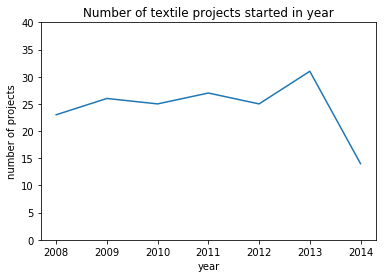

In [28]:
# number of accepted projects in year
import datetime
import matplotlib.pyplot as plt
fmt = "%Y-%m-%d"
p_textile['startDate'] = pd.to_datetime(p_textile.loc[:,'startDate'], format=fmt)
p_textile['startingYear'] = p_textile.loc[:,'startDate'].dt.year
projects_per_year = pd.DataFrame(p_textile.groupby(['startingYear'])['acronym'].count())

ax= plt.subplot()
x = projects_per_year.index
y = projects_per_year.loc[:'acronym']
ax.set_title("Number of textile projects started in year")
ax.set_xlabel("year")
ax.set_ylabel('number of projects')
ax.set_ylim(0,40)
plt.plot(x,y)
plt.show()

# Number of projects in programmes 

fs = textile[['fundingScheme','acronym','totalCost','ecMaxContribution','coordinatorCountry']]
# fs.sort_values(by = 'fundingScheme')
fs.groupby(['fundingScheme'])['acronym'].count()

# # Number of projects in topics

textile.groupby(['topics'])['acronym'].count()

In [18]:
# participant countries statistics

participant_countries_list=[]

for element in p_textile['participantCountries']:
    if isinstance(element, str) :
        l= element.split(';')
        participant_countries_list += l

for element in p_textile['coordinatorCountry']:
    if isinstance(element, str) :
        l= element.split(';')
        participant_countries_list += l

participant_countries_list_s = pd.Series(participant_countries_list)

participant_countries_list_s.value_counts()

DE    109
IT    107
ES     94
BE     83
UK     82
FR     70
NL     47
CH     34
EL     31
DK     28
PT     27
CZ     24
SE     22
PL     21
AT     21
FI     17
RO     15
NO     13
IE     11
TR     11
SI      8
IL      7
BG      6
HU      6
HR      5
EE      4
CY      3
CN      2
TN      2
LV      2
UA      2
LT      2
LU      2
MA      2
US      1
CM      1
RS      1
CA      1
RU      1
TW      1
BA      1
dtype: int64

In [20]:
# tokenize the objectives of each project
# I used RegexpTokenize to eliminate punctuation, ...
p_textile.fillna("missing", inplace=True)
objectives = p_textile[['acronym','title','objective','startDate','endDate', 'coordinator', 'coordinatorCountry', 'participants','participantCountries','call', 'fundingScheme']].values.tolist()


for i in range(0,len(objectives)-1):
    row = objectives[i][2]

    tokenizer = RegexpTokenizer(r'\w+\D+.\D+')      
    tokens = nltk.word_tokenize(row)
    stopWords = set(stopwords.words('english'))
    par_cleaned = [token for token in tokens if token not in stopWords] 

    NN=[]
    for element in par_cleaned:
        words = tokenizer.tokenize(element) 
        tagged = nltk.pos_tag(words)
        if tagged:
            if "NN" in tagged[0][1]:
                NN.append(tagged[0][0])
    objectives[i].append(Counter(NN).most_common(10))
        


In [22]:
p_textile.head()

,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,endDate,...,totalCost,ecMaxContribution,call,fundingScheme,coordinator,coordinatorCountry,participants,participantCountries,subjects,lobjective
209,94172,222468,HEELLESS,ONG,FP7-SME,SME-1,FP7,Development of a heelless shoe to reduce injur...,2008-09-01,2010-08-31,...,1498603,1022000.1,FP7-SME-2007-1,BSG-SME,PRO SUPPORT BV,NL,ZAKLAD PRODUKCYJNO HANDLOWO USLUGOWY;VAN ROOIJ...,PL;NL;ES;UK;DE,ECO;SCI,"as healthy as it is to keep fit by running, th..."
212,94171,222334,FOIRCEV,ONG,FP7-SME,SME-1,FP7,Fire-hose Excellent Manufacturing by means of ...,2008-11-01,2011-01-31,...,808299.04,629403,FP7-SME-2007-1,BSG-SME,EUROPEAN RUBBER COMPOUNDS SA,ES,ASSOCIACAO NACIONAL DE BOMBEIROS PROFISSIONAIS...,PT;NO;ES;DE;UK;IT;FR,ECO;SCI,lay flat rubber fire hoses are a specialized p...
222,100146,287568,FLEXIBILITY,CLO,FP7-ICT,ICT-2011.3.6,FP7,Flexible Multifunctional Bendable Integrated L...,2011-09-01,2015-08-31,...,7016076.00,4899000.00,FP7-ICT-2011-7,CP,TECHNISCHE UNIVERSITAET DRESDEN,DE,OPVIUS GMBH;KONARKA AUSTRIA FORSCHUNGS UND ENT...,DE;AT;FI;CH;IT;EL,EST,flexibiltiy aims at significantly advancing th...
224,100699,287351,INTERACTION,CLO,FP7-ICT,ICT-2011.5.1,FP7,training and monitoring of daily-life physical...,2011-11-01,2015-01-31,...,3872936.00,2620000.00,FP7-ICT-2011-7,CP,UNIVERSITEIT TWENTE,NL,XSENS TECHNOLOGIES B.V.;ROESSINGH RESEARCH AND...,NL;IT;CH,LIF,continuous daily-life monitoring of the functi...
308,105784,308261,MORPHOSIS,ONG,FP7-IDEAS-ERC,ERC-SG-PE8,FP7,Morphing Locally and Globally Structures with ...,2013-01-01,2018-12-31,...,1664600,1664600,ERC-2012-StG_20111012,ERC-SG,UNIVERSITA DEGLI STUDI ROMA TRE,IT,missing,missing,PSE;EAR,the objective of the proposed research is to e...


In [23]:
# just an example

objectives[0]

['HEELLESS',
 'Development of a heelless shoe to reduce injury during running',
 'As healthy as it is to keep fit by running, the repetitive stresses and strains on joints cause a large percentage of the injuries experienced during this sport. HEELLESS aims to develop a novel type of running shoe that prevents joint injury and muscle strain by mitigating the impact force that results from impact force when the foot strikes the ground during running; notably the peak force when landing on the heel is smoothed out. Preliminary trials have proven the concept, but methodical research is needed to enable the SME consortium to further improve the shoe. Research of composite materials to be used for the application of a rigid upper sole will set a new precedent for the market of composite materials. The use of a natural fibre reinforced composite for the application of use in specialised athletic footwear is a novel approach with distinct recycleability advantages. Such composites have not ye

In [24]:
# generate the word document

from docx import Document
from docx.shared import Inches

document = Document()

document.add_heading('FP7 projects on textiles and cloting', 0)
document.add_page_break()
   
for i in range(0,len(objectives)-1):
    document.add_heading(objectives[i][0], level =1)
    p = document.add_paragraph("Project title: " + objectives[i][1]).bold = True
    pp = document.add_paragraph("Start Date: " + objectives[i][3] + "          End Date:" + objectives[i][4])
    pp = document.add_paragraph("Most frequent returning words in objectives: ")
    for j in range(0,len(objectives[i][11])-1):
        pp = document.add_paragraph(str(objectives[i][11][j]),style='List Bullet')
    pp = document.add_paragraph(objectives[i][2])
    pp = document.add_paragraph("Coordinator: "+objectives[i][5] + "     from:" +objectives[i][6])

    if objectives[i][8] != "missing":
        participant = objectives[i][7].split(";")
        participantCountry = objectives[i][8].split(";")

        for k in range(0,len(participant)-1):
            if len(participant) == len(participantCountry):
                pp = document.add_paragraph("participant: "+participant[k] + "     from:" +participantCountry[k])
            else:
                pp = document.add_paragraph("participant: "+participant[k])
    document.add_page_break()

document.save(r'.\FP7_1.docx')